In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl
from sklearn.preprocessing  import StandardScaler

In [3]:
df=pd.read_csv("training.csv")
df

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df.drop(['index'],axis=1,inplace=True)

In [4]:
df.isnull().sum()

index                                       0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [5]:
df['NumberOfDependents'].fillna(0,inplace=True)

In [6]:
df.isnull().sum()

index                                       0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

In [7]:
df.fillna((df['MonthlyIncome'].mean()),inplace=True)
df

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [8]:
df.isnull().sum()

index                                   0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [9]:
df=df[df['DebtRatio']<9000.0]
df

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [10]:
df=df[df['age']>=20]
df

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [11]:
df=df[df['NumberOfDependents']<9]
df

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [12]:
df

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [13]:
df1=df[['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age','NumberOfDependents','NumberOfOpenCreditLinesAndLoans']]

In [14]:
a=df1.sample(2000)

In [15]:
scaler=StandardScaler()
scaler.fit(a)

StandardScaler()

In [16]:
df_scaled=pd.DataFrame(scaler.transform(a),columns=['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age','NumberOfDependents','NumberOfOpenCreditLinesAndLoans'])
df_scaled

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans
0,-0.273297,-0.041041,-0.336483,0.023075,2.293370,-0.671396,-1.269816
1,-0.273297,-0.041115,1.889821,0.023075,-0.322000,-0.671396,0.080436
2,3.659028,0.058242,-0.348259,-0.420413,0.159778,0.227996,1.623582
3,-0.273297,-0.035889,-0.347813,-0.958880,0.916859,-0.671396,1.623582
4,-0.273297,-0.038705,-0.347759,-0.155778,0.022127,-0.671396,1.237795
...,...,...,...,...,...,...,...
1995,3.659028,-0.032927,-0.348799,-0.304750,-1.285558,2.026780,-0.884029
1996,-0.273297,-0.032927,-0.349096,-0.732663,1.742766,-0.671396,-1.655602
1997,3.659028,-0.033475,-0.348818,-0.869987,-0.597302,1.127388,-0.498243
1998,-0.273297,-0.033012,-0.348774,-0.624765,-1.698511,-0.671396,-0.884029


Target looks like classification


C:\Users\Admin\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 6 outliers in column MonthlyIncome.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Admin\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 1 outliers in column NumberOfOpenCreditLinesAndLoans.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Admin\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 3 outliers in column DebtRatio.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Admin\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 4 outliers in column NumberOfDependents.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Admin\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 3 outliers in column RevolvingUtilizationOfUnsecuredLines.
  warn("Dropped {} outliers in column {}.".format(


Linear Discriminant Analysis training set score: 0.500


[[<Figure size 864x288 with 6 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

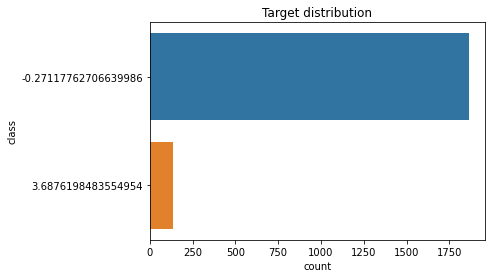

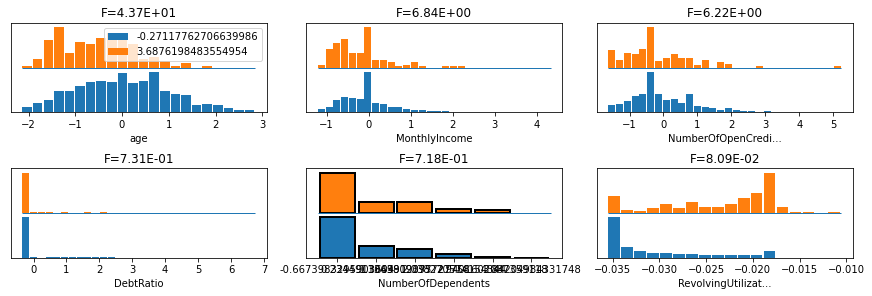

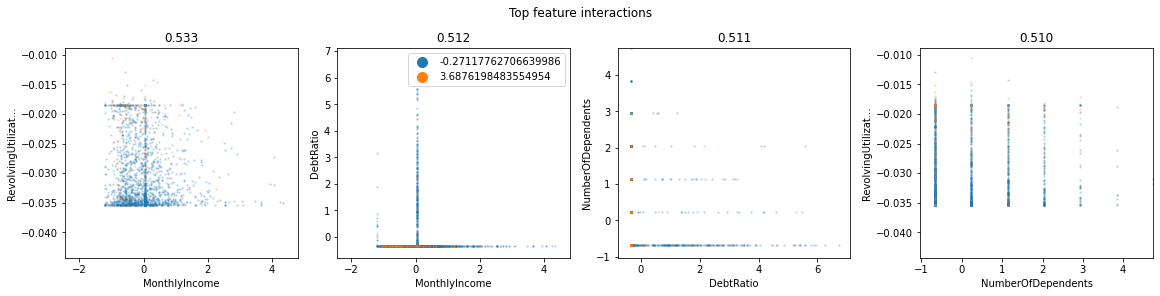

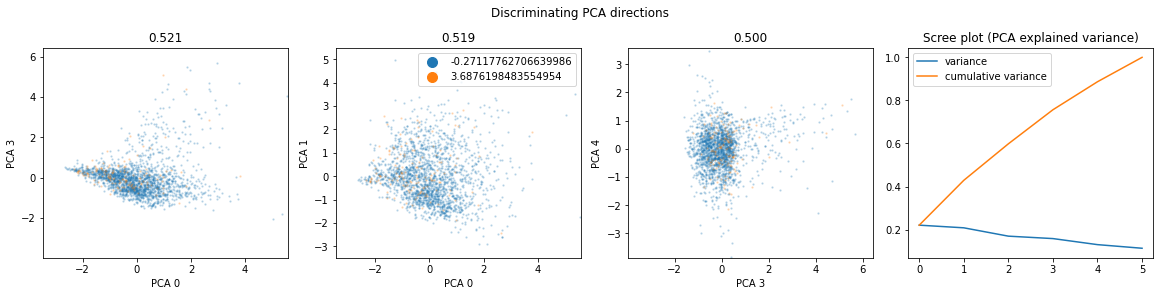

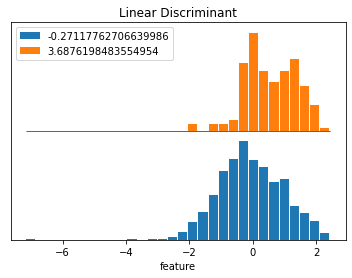

In [17]:
dabl.plot(df_scaled,target_col='SeriousDlqin2yrs')

In [ ]:
df.corr()

<AxesSubplot:>

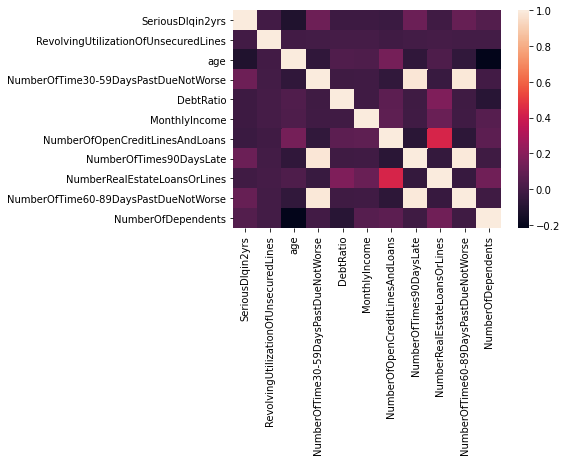

In [17]:
sns.heatmap(df.corr())

In [18]:
df_scaled.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'MonthlyIncome', 'age', 'NumberOfDependents',
       'NumberOfOpenCreditLinesAndLoans'],
      dtype='object')

In [ ]:
sns.boxplot(data=a,x='age')

In [ ]:
sns.boxplot(data=a,x='NumberOfDependents')

<AxesSubplot:xlabel='MonthlyIncome'>

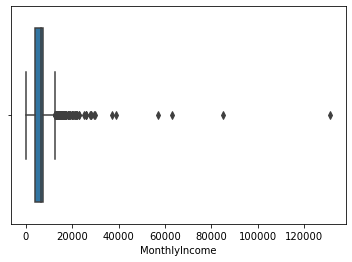

In [21]:
sns.boxplot(data=a,x='MonthlyIncome')

<AxesSubplot:xlabel='DebtRatio'>

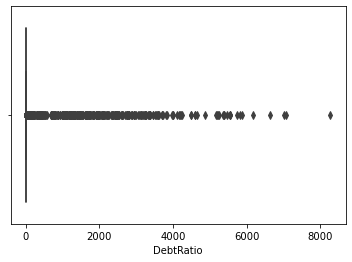

In [22]:
sns.boxplot(data=a,x='DebtRatio')

<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans'>

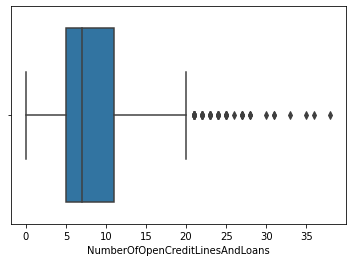

In [23]:
sns.boxplot(data=a,x='NumberOfOpenCreditLinesAndLoans')

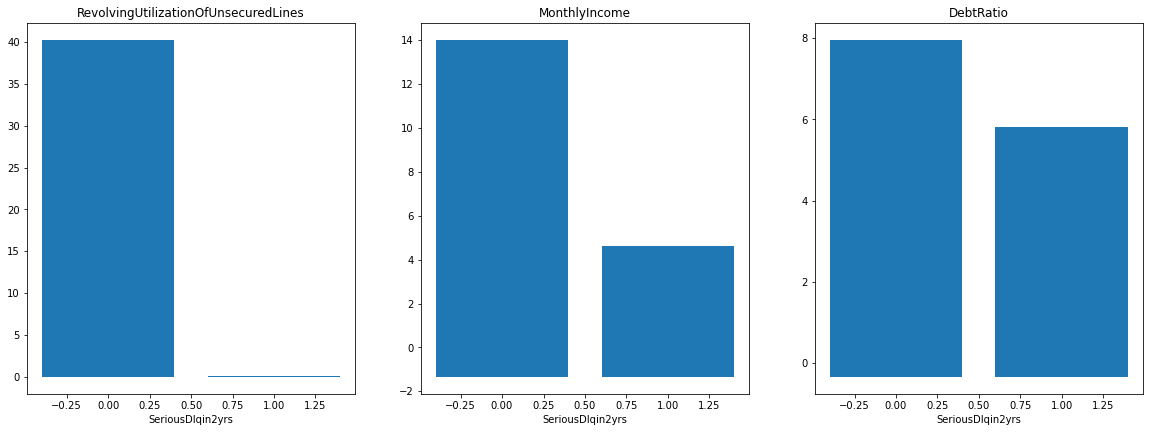

In [19]:
#delinquency with other columns
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.title("RevolvingUtilizationOfUnsecuredLines")
plt.bar(x=a['SeriousDlqin2yrs'],height=df_scaled['RevolvingUtilizationOfUnsecuredLines'])
plt.xlabel("SeriousDlqin2yrs")

plt.subplot(2,3,2)
plt.title("MonthlyIncome")
plt.bar(x=a['SeriousDlqin2yrs'],height=df_scaled['MonthlyIncome'])
plt.xlabel("SeriousDlqin2yrs")

plt.subplot(2,3,3)
plt.title("DebtRatio")
plt.bar(x=a['SeriousDlqin2yrs'],height=df_scaled['DebtRatio'])
plt.xlabel("SeriousDlqin2yrs")


plt.show()

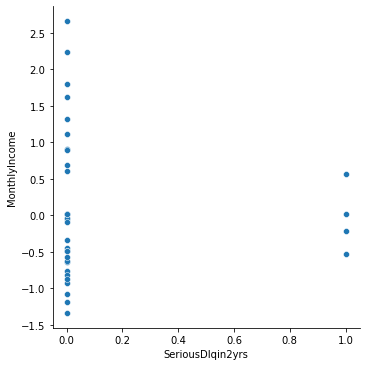

In [17]:
sns.relplot(x=a['SeriousDlqin2yrs'], y=df_scaled['MonthlyIncome'])

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='age'>

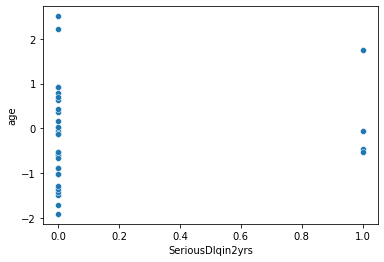

In [21]:
sns.scatterplot(y=df_scaled['age'], x=a['SeriousDlqin2yrs'])

<AxesSubplot:xlabel='NumberOfDependents', ylabel='SeriousDlqin2yrs'>

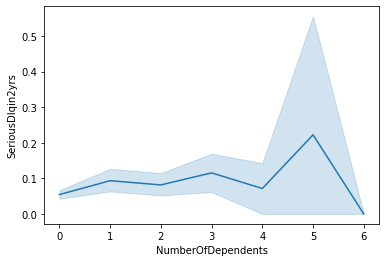

In [20]:
sns.lineplot(data=a,x='NumberOfDependents', y='SeriousDlqin2yrs')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='age'>

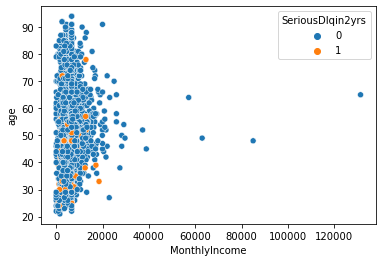

In [28]:
sns.scatterplot(y='age',x='MonthlyIncome',data=a,hue='SeriousDlqin2yrs')

In [29]:
x=a.sort_values(by='age')
x

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans
148326,0,0.000000,0.000000,2000.000000,21,0.0,1
114618,0,1.000000,0.382460,820.000000,21,0.0,1
84604,0,1.000000,0.000000,929.000000,21,0.0,1
135966,0,0.043956,0.001218,820.000000,22,0.0,2
31564,0,0.233530,0.016129,929.000000,22,0.0,3
...,...,...,...,...,...,...,...
92117,0,0.079528,290.000000,6670.221237,90,0.0,4
109754,0,0.001595,0.000286,10500.000000,90,0.0,11
7948,0,0.022668,0.004254,7991.000000,91,0.0,9
12463,0,0.098499,0.609689,2538.000000,91,0.0,11


In [30]:
px.scatter(data_frame=x,
    x='MonthlyIncome',
    y='DebtRatio',
    color='SeriousDlqin2yrs',animation_frame='age')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='DebtRatio'>

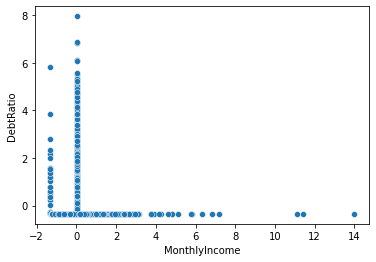

In [24]:
#to check having better monthly income will affect debtratio
sns.scatterplot(y='DebtRatio',x='MonthlyIncome',data=df_scaled)

<AxesSubplot:xlabel='age', ylabel='RevolvingUtilizationOfUnsecuredLines'>

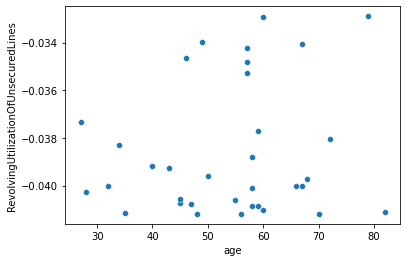

In [25]:
sns.scatterplot(y=df_scaled['RevolvingUtilizationOfUnsecuredLines'],x=a['age'])